In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
names_TAMER = ["gian_marco", "gian_marco2", "gian_marco3", "andrew_wang_1", "gian_marco4", "gian_marco5", "gian_marco6", "gian_marco7", "gian_marco8", "gian_marco9", "gian_marco10"]
names_retro_TAMER_multiple = ["gian_marco", "gian_marco2", "andrew_wang_1"]
names_retro_TAMER_single = ["andrew_wang_1", "andrew_wang_2","gian_marco", "gian_marco2", "gian_marco3", "gian_marco4"]

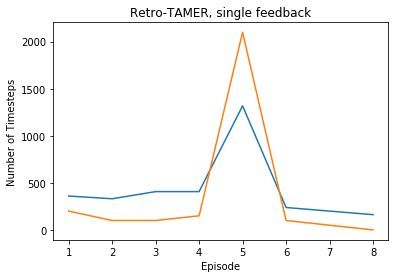

At peak: 162 timesteps
Second episode: 331 timesteps
Third episode: 407 timesteps


In [106]:
name = "results/Retro_TAMER_single_andrew_wang_1.csv"
df = pd.read_csv(name)

x = np.linspace(1, df["Timesteps"].shape[0] + 1, df["Timesteps"].shape[0], dtype=int)
plt.plot(x, df["Timesteps"])
plt.plot(x, df["Feedbacks"]*50)
plt.title("Retro-TAMER, single feedback")
plt.xlabel("Episode")
plt.ylabel("Number of Timesteps")
plt.show()
print("At peak: %d timesteps" % (np.array(df["Timesteps"])[-1]))
print("Second episode: %d timesteps" % (np.array(df["Timesteps"])[1]))
print("Third episode: %d timesteps" % (np.array(df["Timesteps"])[2]))

In [9]:
def collect_data(filepath, names):
    data = {"Peak": [], "Episodes for Peak": [], "Second Episode": [], "Third Episode": [],  "Fs 2nd episode": []}
    for name in names:
        df = pd.read_csv(filepath + "_" + name + ".csv")
        data["Peak"].append(np.array(df["Timesteps"])[-1])
        data["Second Episode"].append(np.array(df["Timesteps"])[1])
        try:
            data["Third Episode"].append(np.array(df["Timesteps"])[2])
        except:
            data["Third Episode"].append(0)
        data["Episodes for Peak"].append(int(df["Timesteps"].shape[0]))
        data["Fs 2nd episode"].append(np.array(df["Feedbacks"])[1])
    return pd.DataFrame(data)

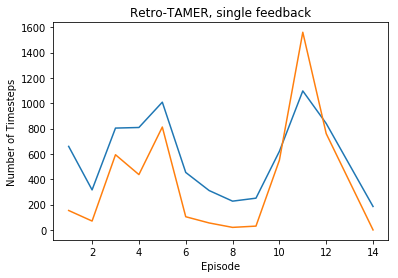

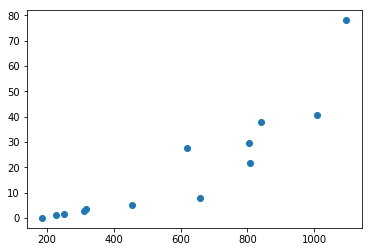

In [66]:
filepath = "results/Retro_TAMER_single" 
names = names_retro_TAMER_single

dfs = []
max_timesteps = 0
for name in names:
    df = pd.read_csv(filepath + "_" + name + ".csv")
    dfs.append(df)
    max_timesteps = max(max_timesteps, df["Timesteps"].shape[0])

timesteps_R_TAMER_s = np.zeros(max_timesteps)
to_average = np.zeros(max_timesteps)
feedbacks = np.zeros(max_timesteps)
for df in dfs:
    for i in range(df["Timesteps"].shape[0]):
        timesteps_R_TAMER_s[i] += np.array(df["Timesteps"])[i]
        feedbacks[i] += np.array(df["Feedbacks"])[i]
        to_average[i] += 1

for i in range(max_timesteps):
    timesteps_R_TAMER_s[i] = float(timesteps_R_TAMER_s[i])/float(to_average[i]) 
    feedbacks[i] = float(feedbacks[i])/float(to_average[i])
    
x = np.linspace(1, max_timesteps + 1, max_timesteps, dtype=int)
plt.plot(x, timesteps_R_TAMER_s)
plt.plot(x, feedbacks*20)
plt.title("Retro-TAMER, single feedback")
plt.xlabel("Episode")
plt.ylabel("Number of Timesteps")
plt.show()

plt.scatter(timesteps_R_TAMER_s, feedbacks)
plt.show()

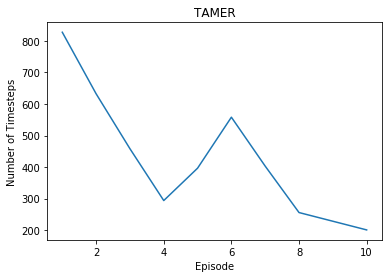

In [61]:
filepath = "results/TAMER" 
names = names_TAMER

dfs = []
max_timesteps = 0
for name in names:
    df = pd.read_csv(filepath + "_" + name + ".csv")
    dfs.append(df)
    max_timesteps = max(max_timesteps, df["Timesteps"].shape[0])

timesteps_TAMER = np.zeros(max_timesteps)
to_average = np.zeros(max_timesteps)
for df in dfs:
    for i in range(df["Timesteps"].shape[0]):
        timesteps_TAMER[i] += np.array(df["Timesteps"])[i]
        feedbacks[i] += np.array(df["Feedbacks"])[i]
        to_average[i] += 1

for i in range(max_timesteps):
    timesteps_TAMER[i] = float(timesteps_TAMER[i])/float(to_average[i])      
    
x = np.linspace(1, max_timesteps + 1, max_timesteps, dtype=int)
plt.plot(x, timesteps_TAMER)
plt.plot(x, feedbacks*20)
plt.title("TAMER")
plt.xlabel("Episode")
plt.ylabel("Number of Timesteps")
plt.show()

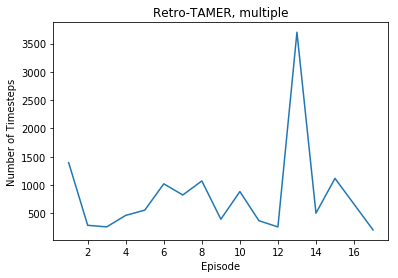

In [62]:
filepath = "results/Retro_TAMER_multiple" 
names = names_retro_TAMER_multiple

dfs = []
max_timesteps = 0
for name in names:
    df = pd.read_csv(filepath + "_" + name + ".csv")
    dfs.append(df)
    max_timesteps = max(max_timesteps, df["Timesteps"].shape[0])

timesteps_R_TAMER_m = np.zeros(max_timesteps)
to_average = np.zeros(max_timesteps)
for df in dfs:
    for i in range(df["Timesteps"].shape[0]):
        timesteps_R_TAMER_m[i] += np.array(df["Timesteps"])[i]
        to_average[i] += 1
        
for i in range(max_timesteps):
    timesteps_R_TAMER_m[i] = float(timesteps_R_TAMER_m[i])/float(to_average[i])      
    
x = np.linspace(1, max_timesteps + 1, max_timesteps, dtype=int)
plt.plot(x, timesteps_R_TAMER_m)
# plt.plot(x, df["Feedbacks"]*50)
plt.title("Retro-TAMER, multiple")
plt.xlabel("Episode")
plt.ylabel("Number of Timesteps")
plt.show()

[659.1666666666666, 315.8333333333333, 803.6666666666666, 808.3333333333334, 1008.2, 453.6, 310.75, 227.0, 250.5, 620.0, 1097.0, 840.0, 185.0]
None


ValueError: x and y must have same first dimension, but have shapes (17,) and (1,)

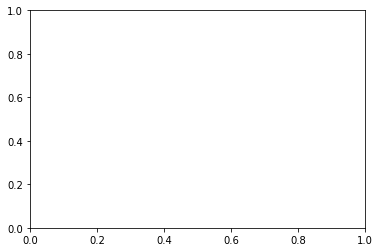

In [63]:
max_timesteps = 17
if i in range(max_timesteps):
    if timesteps_R_TAMER_s.shape[0] < max_timesteps:
        timesteps_R_TAMER_s = list(timesteps_R_TAMER_s)
        print(timesteps_R_TAMER_s)
        timesteps_R_TAMER_s = np.array(timesteps_R_TAMER_s.append(0.0))
        print(timesteps_R_TAMER_s)
    if timesteps_R_TAMER_m.shape[0] < max_timesteps:
        timesteps_R_TAMER_m = list(timesteps_R_TAMER_m)
        timesteps_R_TAMER_m = np.array(timesteps_R_TAMER_m.append(0.0))
    if timesteps_TAMER.shape[0] < max_timesteps:
        timesteps_TAMER = list(timesteps_TAMER)
        timesteps_TAMER = np.array(timesteps_TAMER.append(0.0))

x = np.linspace(1, max_timesteps + 1, max_timesteps, dtype=int)
plt.plot(x, timesteps_R_TAMER_s, label="lol")
plt.plot(x, timesteps_R_TAMER_m)
plt.plot(x, timesteps_TAMER)
plt.title("Retro-TAMER, multiple")
plt.xlabel("Episode")
plt.ylabel("Number of Timesteps")
plt.legend()
plt.show()

In [10]:
print(collect_data("results/TAMER", names_TAMER))

    Peak  Episodes for Peak  Second Episode  Third Episode  Fs 2nd episode
0    187                  5            1246            588              11
1    201                  9            1260            363              13
2    184                  3             248            184               2
3    198                  7             482            805               4
4    127                  4             389            328               4
5    187                  2             187              0               0
6    258                  4            1000            401               8
7    183                  2             183              0               0
8    198                  6            1009           1013               9
9    197                  4             692            274               7
10   168                  3             258            168               1


In [11]:
print(collect_data("results/Retro_TAMER_multiple", names_retro_TAMER_multiple))

   Peak  Episodes for Peak  Second Episode  Third Episode  Fs 2nd episode
0   184                 12             297            253               1
1   196                 11             235            336               3
2   206                 16             330            190               2


In [16]:
print(collect_data("results/Retro_TAMER_single", names_retro_TAMER_single))

   Peak  Episodes for Peak  Second Episode  Third Episode  Fs 2nd episode
0   162                  7             331            407               2
1   131                 10             260            175               1
2   185                 13             471           1900               6
3   179                  8             327           1704               8
4   135                  4             253            228               2
5   197                  6             253            408               2


In [7]:
name = "results/Retro_TAMER_multiple_Andrew_cervantes.csv"
df = pd.read_csv(name)
print(df)

name = "results/TAMER_james_cameron.csv"
df = pd.read_csv(name)
print(df)

   Timesteps  Feedbacks  Retro-Feedbacks  Experience Level First Trial?
0       1300         11               10               0.0            y
1       1752         24               16               NaN          NaN
    Timesteps  Feedbacks  Experience Level First Trial?
0         764         26               0.0            y
1         315         21               NaN          NaN
2         345         14               NaN          NaN
3         267         24               NaN          NaN
4         386         24               NaN          NaN
5         245          4               NaN          NaN
6         684         10               NaN          NaN
7         388         40               NaN          NaN
8         246         11               NaN          NaN
9         534         18               NaN          NaN
10        637         23               NaN          NaN
11        801         17               NaN          NaN
12        519         12               NaN          NaN
